# **HEART DISEASE PREDICTION**

**Problem Statement:**
- 
You are the data scientist at a medical research facility. The facility wants you t 
build a machine learning model to classify if the given data of a patient should te l
if the patient is at the risk of a heart atta

**DATA SET INFORMATION**
- age  
- sex
- cp : chest pain type (4 values)
- trestbps : resting blood pressure (on admission to the hospital)
- chol : serum cholestoral
- fbs : fasting blood sugar > 120 mg/dl
- restecg : resting electrocardiographic results (values 0,1,2)
- thalach : maximum heart rate achieved
- exang : exercise induced angina
- oldpeak : ST depression induced by exercise relative to rest
- slope : the slope of the peak exercise ST segment
- ca : number of major vessels (0-3) colored by flourosopy
- thal : 0 = normal; 1 = fixed defect; 2 = reversable defect
- target : diagnosis of heart diseaseck.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**1. Data Analysis:**
- a. Import the dataset
- b. Get information about the dataset (mean, max, min, quartiles etc.)
- c. Find the correlation between all fields

In [2]:
# Load dataset
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Data Analysis
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
print("\nStatistical Summary:\n")
df.describe()


Statistical Summary:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Correlation Matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n")
corr_matrix


Correlation Matrix:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


**2. Data Visualization:**
- a. Visualize the number of patients having a heart disease and not having a heart disease
- b. Visualize the age and whether a patient has disease or not
- c. Visualize correlation between all features using a heat map

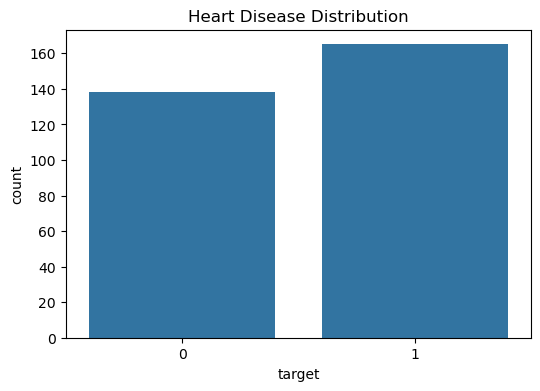

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()


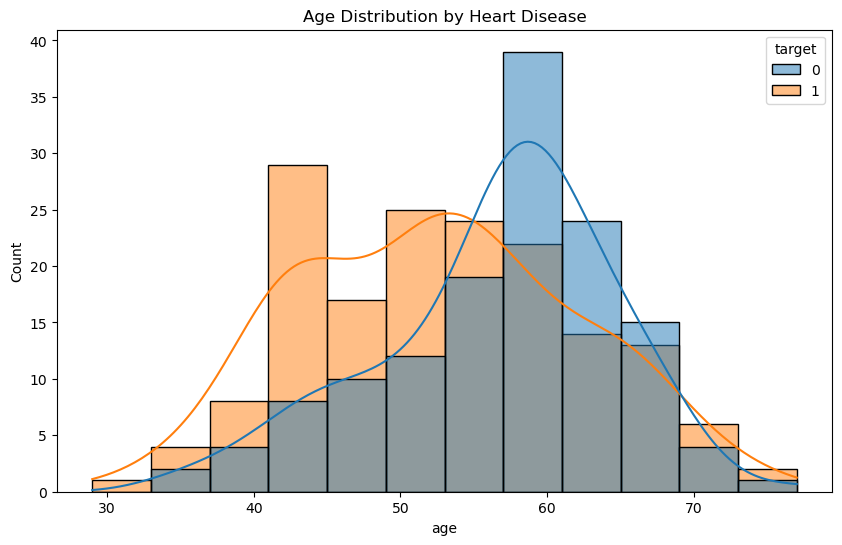

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', hue='target', kde=True)
plt.title("Age Distribution by Heart Disease")
plt.show()

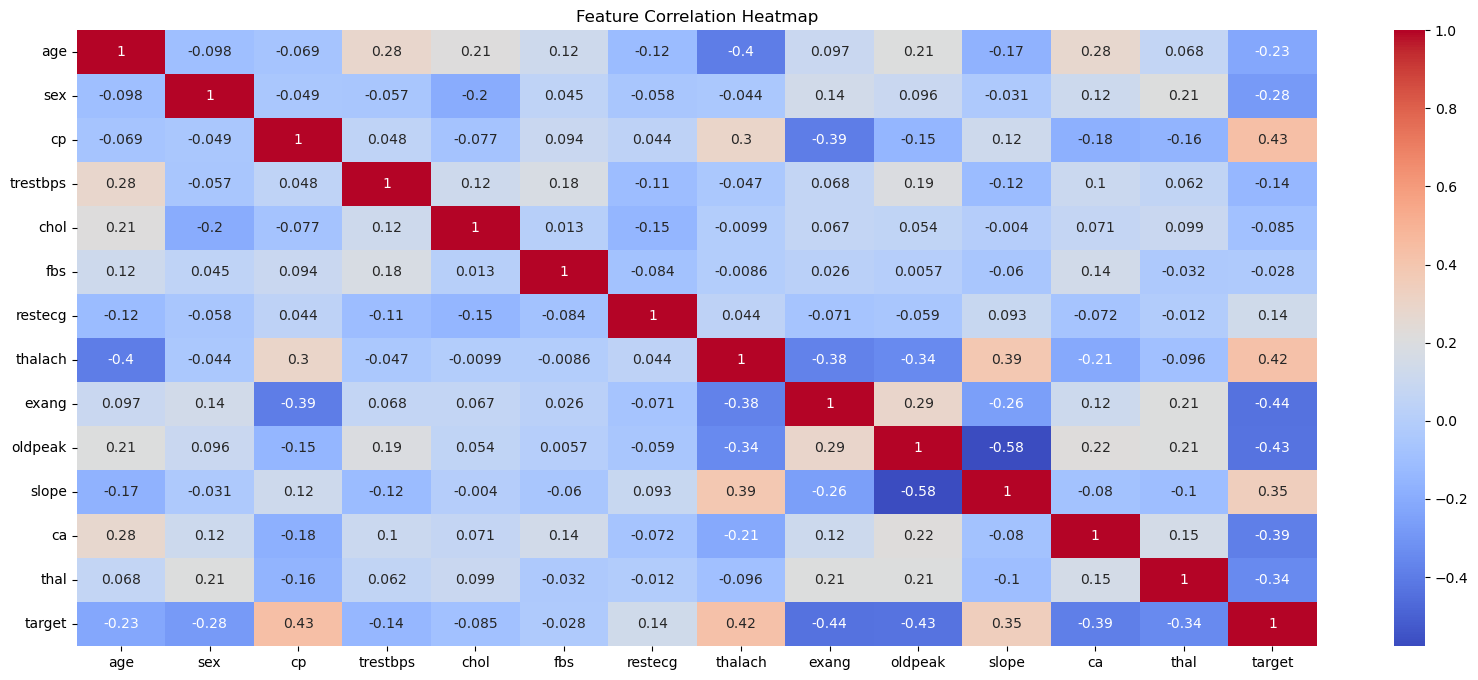

In [8]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**3. Logistic Regression:**
- a. Build a simple logistic regression model:
  - i. Divide the dataset in 70:30 ratio
  - ii. Build the model on train set and predict the values on test set
  - iii. Build the confusion matrix and get the accuracy score

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import graphviz

In [21]:
# Split dataset
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Logistic Regression
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [25]:
# Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Model Evaluation:")
    print("---------------------------------------------")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("---------------------------------------------")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract key metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("---------------------------------------------")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("---------------------------------------------")

In [26]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")

Logistic Regression Model Evaluation:
---------------------------------------------
Confusion Matrix:
[[32  9]
 [ 8 42]]
---------------------------------------------
Accuracy: 0.8132
Precision: 0.8235
Recall: 0.8400
F1 Score: 0.8317
---------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Accuracy Score: 0.8131868131868132
---------------------------------------------


**4. Decision Tree:**
- a. Build a decision tree model:
  - i. Divide the dataset in 70:30 ratio
  - ii. Build the model on train set and predict the values on test set ratio
  - iii. Build the confusion matrix and calculate the accuracy ratio
  - iv. Visualize the decision tree using the Graphviz package


In [27]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [28]:
evaluate_model(y_test, y_pred_dt, "Decision Tree")

Decision Tree Model Evaluation:
---------------------------------------------
Confusion Matrix:
[[30 11]
 [14 36]]
---------------------------------------------
Accuracy: 0.7253
Precision: 0.7660
Recall: 0.7200
F1 Score: 0.7423
---------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.77      0.72      0.74        50

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91

Accuracy Score: 0.7252747252747253
---------------------------------------------


In [29]:
import os
import graphviz

# Set Graphviz binary path manually
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"

# Decision Tree Visualization
dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

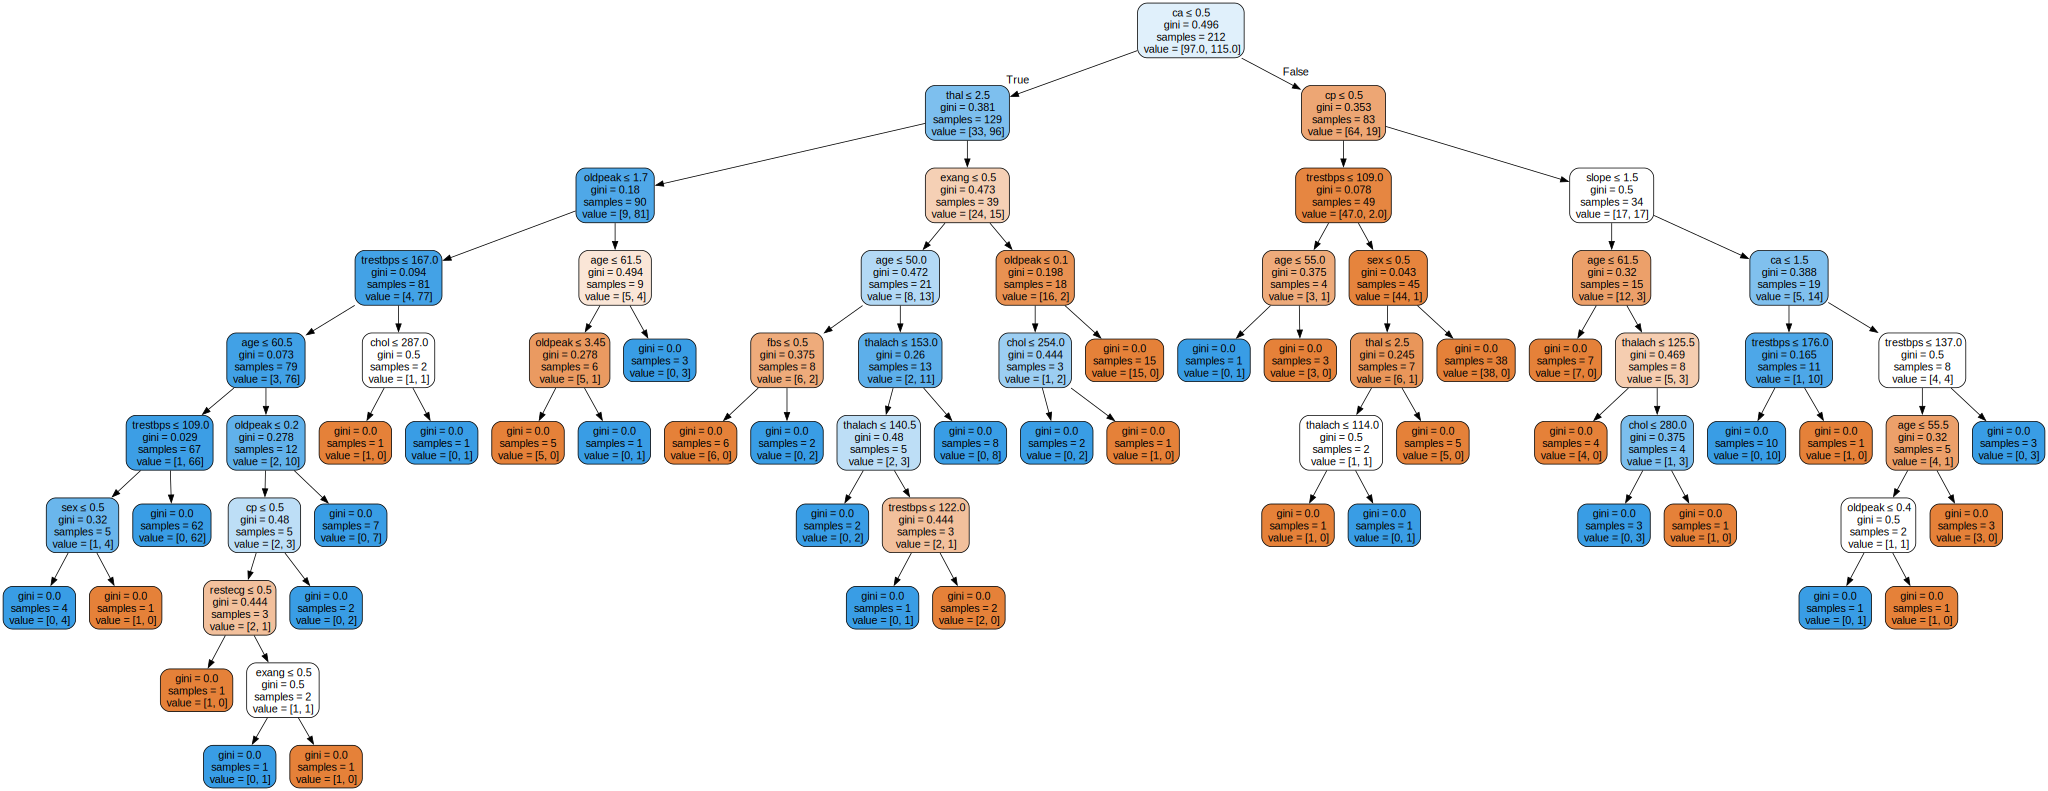

In [30]:
graph

**5. Random Forest:**
- a. Build a Random Forest model:
  - i. Divide the dataset in 70:30 ratio
  - ii. Build the model on train set and predict the values on test set
  - iii. Build the confusion matrix and calculate the accuracy
  - iv. Visualize the model using the Graphviz package

In [31]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [32]:
evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest Model Evaluation:
---------------------------------------------
Confusion Matrix:
[[32  9]
 [ 8 42]]
---------------------------------------------
Accuracy: 0.8132
Precision: 0.8235
Recall: 0.8400
F1 Score: 0.8317
---------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Accuracy Score: 0.8131868131868132
---------------------------------------------


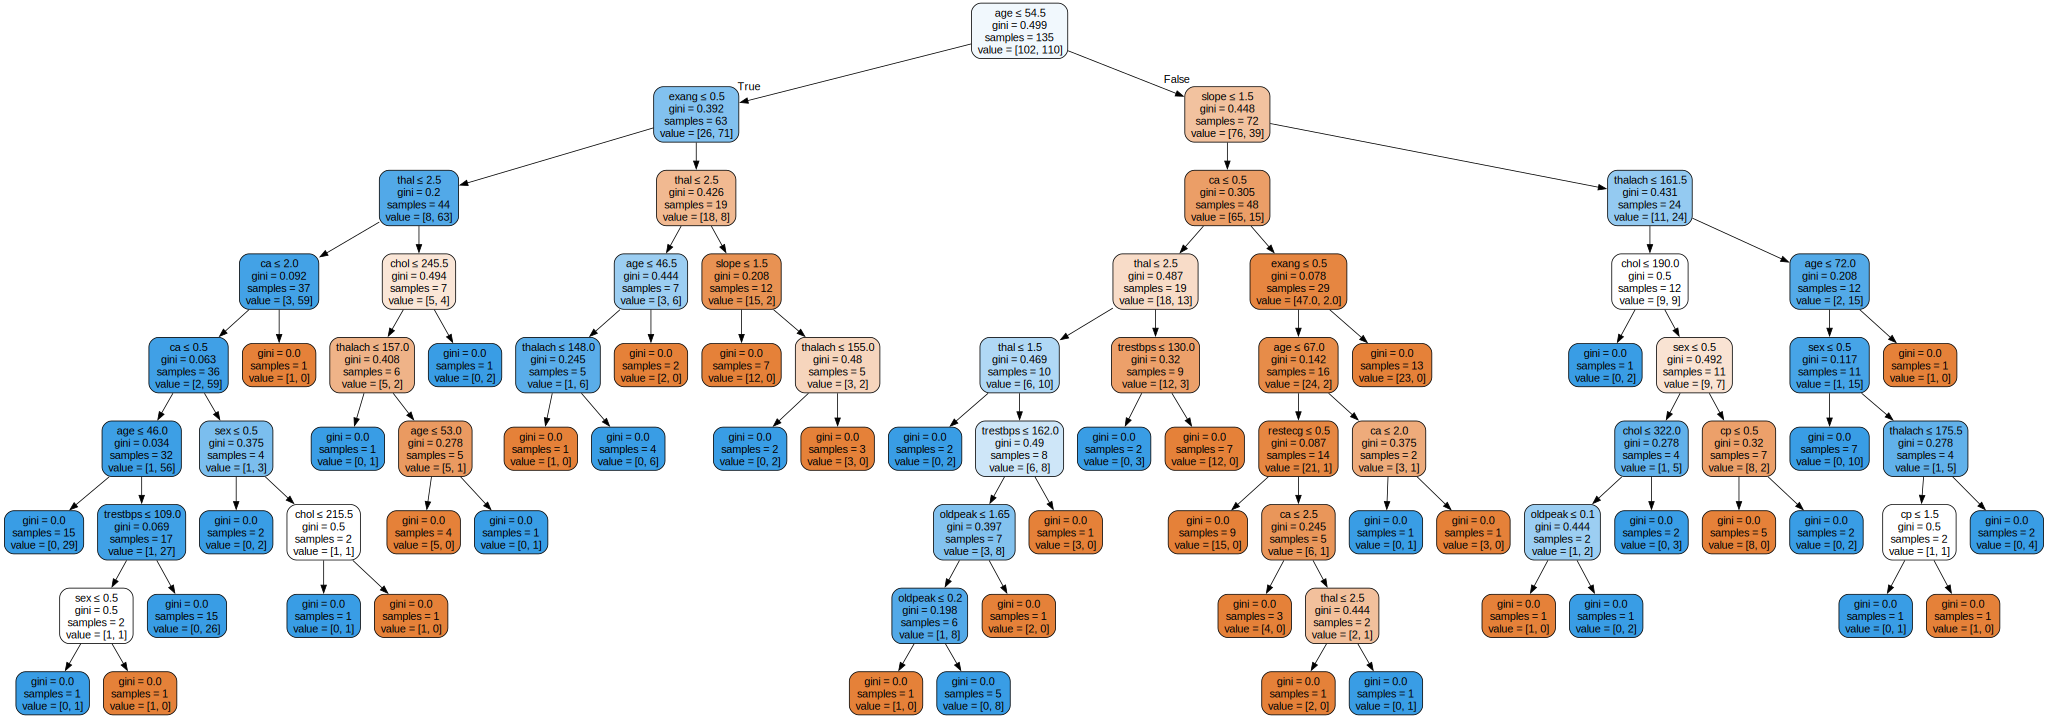

In [33]:
from sklearn.tree import export_graphviz
import graphviz

# Pick a single tree from the Random Forest
tree_index = 0  # Change index to visualize different trees
rf_tree = rf_model.estimators_[tree_index]

# Export the chosen tree
dot_data_rf = export_graphviz(
    rf_tree, 
    out_file=None, 
    feature_names=X.columns, 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Render and Save Random Forest Tree Graph
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree")  # Saves as "random_forest_tree.pdf"
graph_rf  # Display in notebook (if using Jupyter)


**6. Select the best model**
- a. Print the confusion matrix of all classifiers
- b. Print the classification report of all classifiers
- c. Calculate Recall Precision and F1 score of all the models
- d. Visualize confusion matrix using heatmaps
- e. Select the best model based on the best accuracies

In [34]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression Model Evaluation:
---------------------------------------------
Confusion Matrix:
[[32  9]
 [ 8 42]]
---------------------------------------------
Accuracy: 0.8132
Precision: 0.8235
Recall: 0.8400
F1 Score: 0.8317
---------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Accuracy Score: 0.8131868131868132
---------------------------------------------
Decision Tree Model Evaluation:
---------------------------------------------
Confusion Matrix:
[[30 11]
 [14 36]]
---------------------------------------------
Accuracy: 0.7253
Precision: 0.7660
Recall: 0.7200
F1 Score: 0.7423
---------------------------------------------
Classification 

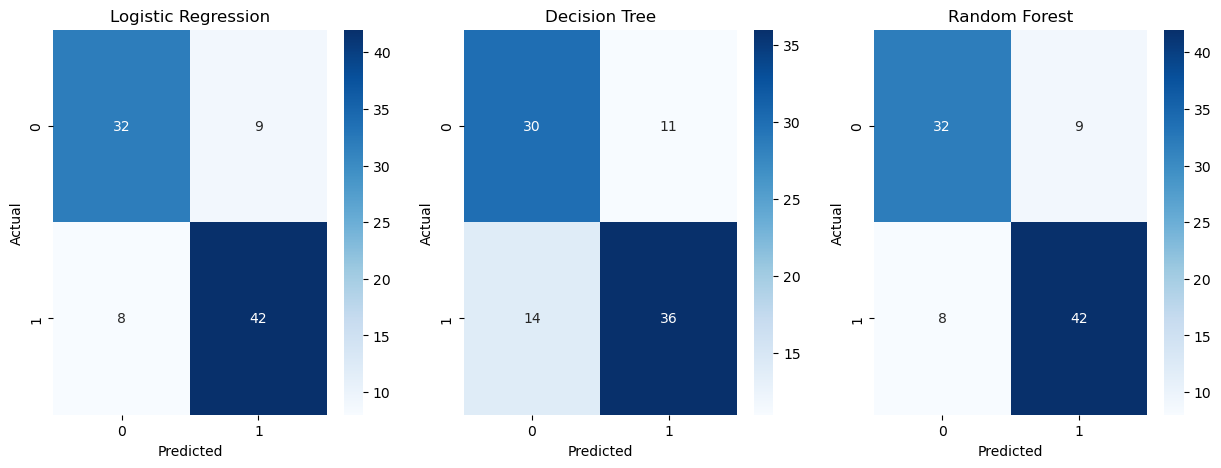

In [35]:
# Confusion Matrix Visualization
plt.figure(figsize=(15, 5))
for i, (y_pred, title) in enumerate(zip([y_pred_log, y_pred_dt, y_pred_rf], 
                                        ["Logistic Regression", "Decision Tree", "Random Forest"])):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.show()

In [36]:
# Selecting Best Model
accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}
best_model = max(accuracies, key=accuracies.get)
print(f"Best model is: {best_model} with accuracy {accuracies[best_model]:.2f}")

Best model is: Logistic Regression with accuracy 0.81
